<a href="https://colab.research.google.com/github/dharapatel2908/Code-Clause---Data-Science/blob/main/TASK-%201/WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Uploading the data

In [1]:
from google.colab import files
RedWine = files.upload()

Saving redwinequality.csv to redwinequality.csv


In [2]:
import pandas as pd
Rw = pd.read_csv("redwinequality.csv")

In [3]:
Rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
Rw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
Rw.shape

(1599, 12)

In [6]:
Rw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
Rw= Rw.drop_duplicates()

In [8]:
Rw.shape

(1359, 12)

EDA- Handling Outliers

In [9]:
print("Skewness of fixed acidity: ", Rw['fixed acidity'].skew())
print("Skewness of volatile acidity: ", Rw['volatile acidity'].skew())
print("Skewness of citric acid : ", Rw['citric acid'].skew())
print("Skewness of residual sugar: ", Rw['residual sugar'].skew())
print("Skewness of chlorides: ", Rw['chlorides'].skew())
print("Skewness of free sulfur dioxide: ", Rw['free sulfur dioxide'].skew())
print("Skewness of total sulfur dioxide: ", Rw['total sulfur dioxide'].skew())
print("Skewness of density: ", Rw['density'].skew())
print("Skewness of pH: ", Rw['pH'].skew())
print("Skewness of sulphates: ", Rw['sulphates'].skew())
print("Skewness of alcohol: ", Rw['alcohol'].skew())
print("Skewness of quality: ", Rw['quality'].skew())

Skewness of fixed acidity:  0.9410413664561449
Skewness of volatile acidity:  0.7292789463991854
Skewness of citric acid :  0.31272554238899036
Skewness of residual sugar:  4.548153403940447
Skewness of chlorides:  5.502487294623722
Skewness of free sulfur dioxide:  1.2265794991760643
Skewness of total sulfur dioxide:  1.5403680777213933
Skewness of density:  0.04477785573116107
Skewness of pH:  0.2320322752014824
Skewness of sulphates:  2.4065046145674196
Skewness of alcohol:  0.8598411692032926
Skewness of quality:  0.19240658731658308


In [10]:
cols = ['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates']
Q1 = Rw[cols].quantile(0.25)
Q3 = Rw[cols].quantile(0.75)
IQR = Q3- Q1
rw = Rw[~((Rw[cols] < (Q1 - 1.5 * IQR)) |(Rw[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [11]:
print("Skewness of fixed acidity: ", rw['fixed acidity'].skew())
print("Skewness of volatile acidity: ", rw['volatile acidity'].skew())
print("Skewness of citric acid : ", rw['citric acid'].skew())
print("Skewness of residual sugar: ", rw['residual sugar'].skew())
print("Skewness of chlorides: ", rw['chlorides'].skew())
print("Skewness of free sulfur dioxide: ", rw['free sulfur dioxide'].skew())
print("Skewness of total sulfur dioxide: ", rw['total sulfur dioxide'].skew())
print("Skewness of density: ", rw['density'].skew())
print("Skewness of pH: ", rw['pH'].skew())
print("Skewness of sulphates: ", rw['sulphates'].skew())
print("Skewness of alcohol: ", rw['alcohol'].skew())
print("Skewness of quality: ", rw['quality'].skew())

Skewness of fixed acidity:  0.8502512865362838
Skewness of volatile acidity:  0.6190464579320827
Skewness of citric acid :  0.32942400527553567
Skewness of residual sugar:  0.5451751756623673
Skewness of chlorides:  0.16924319071261462
Skewness of free sulfur dioxide:  0.8398982560128428
Skewness of total sulfur dioxide:  0.9764514672286396
Skewness of density:  -0.10315928524146313
Skewness of pH:  0.3050786985289985
Skewness of sulphates:  0.6002171195613981
Skewness of alcohol:  0.8669673939189382
Skewness of quality:  0.27389173285740404


 Visualization

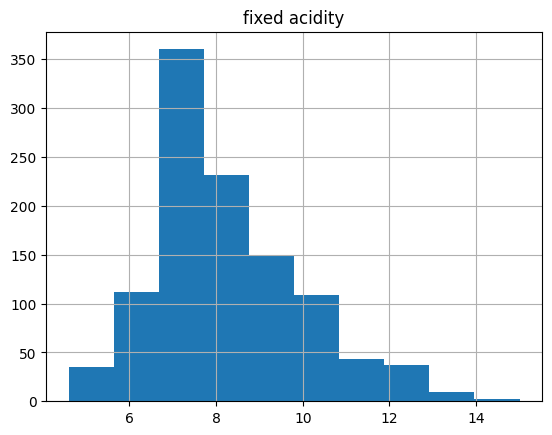

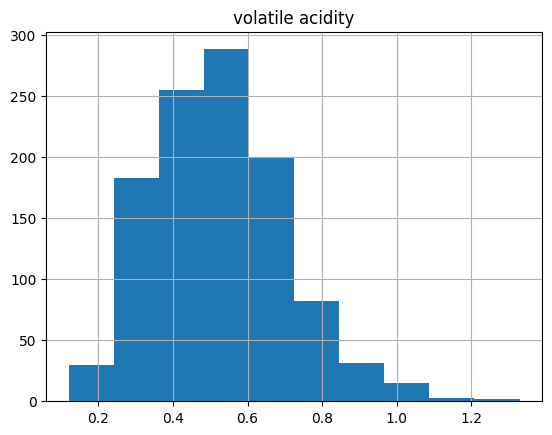

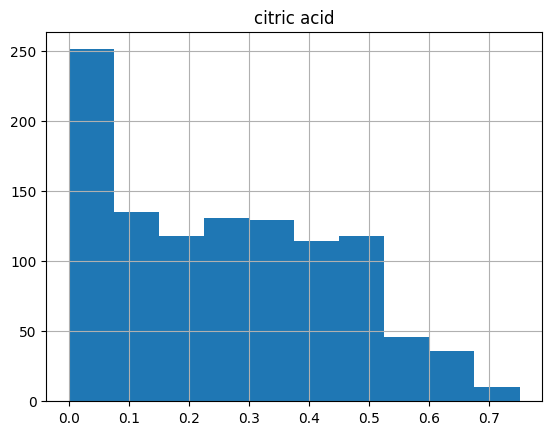

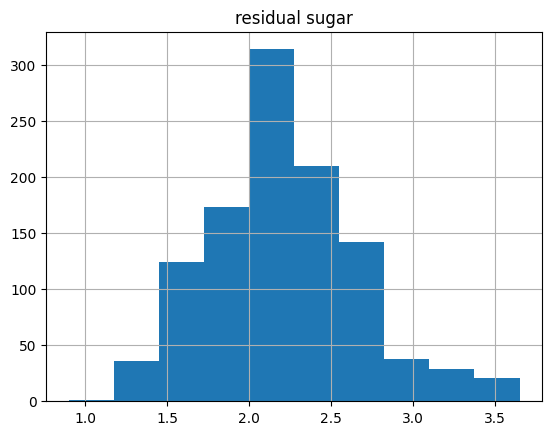

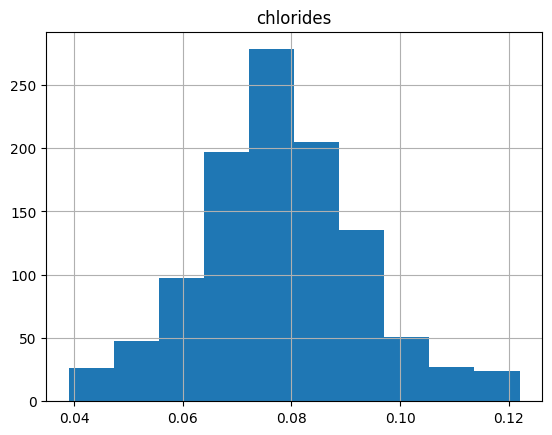

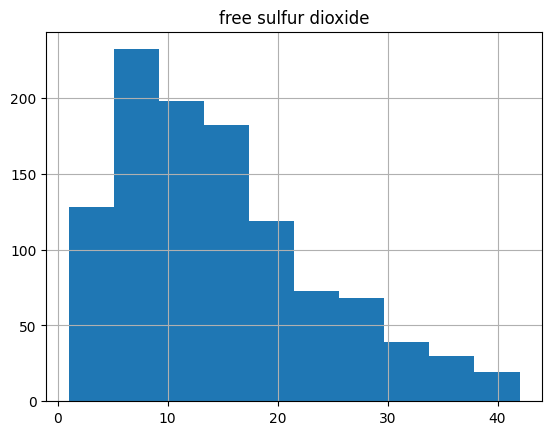

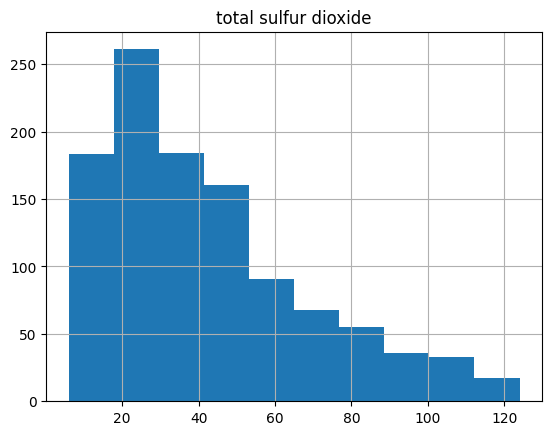

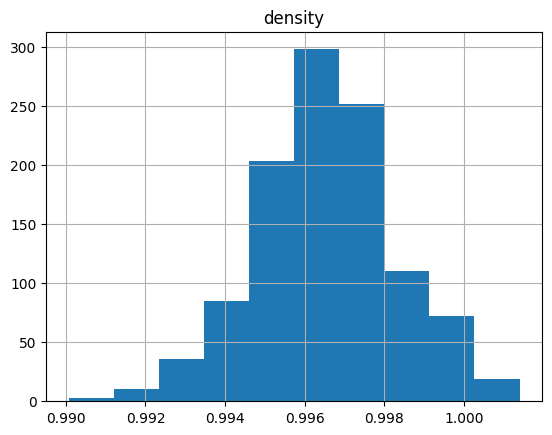

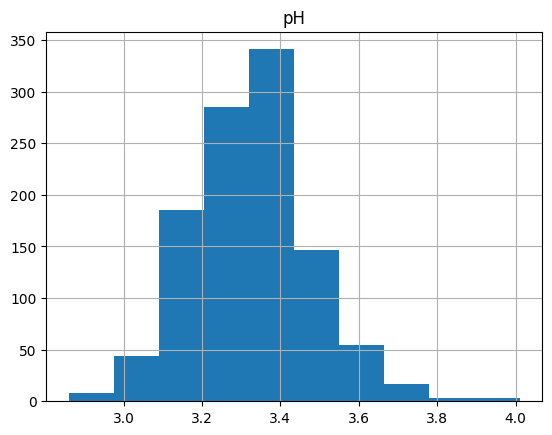

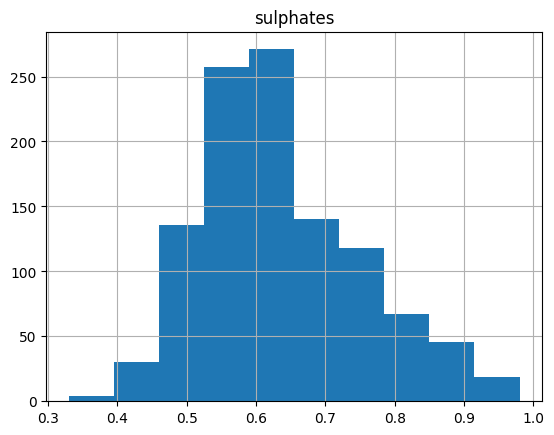

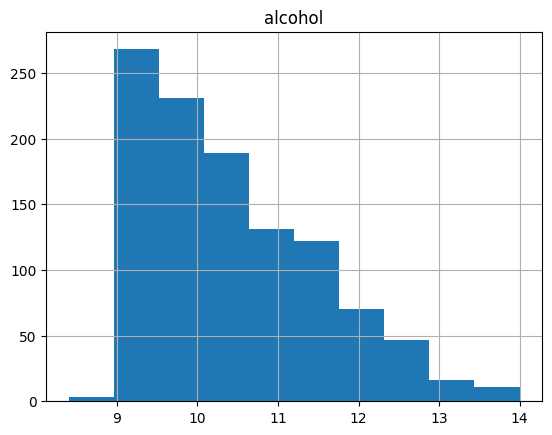

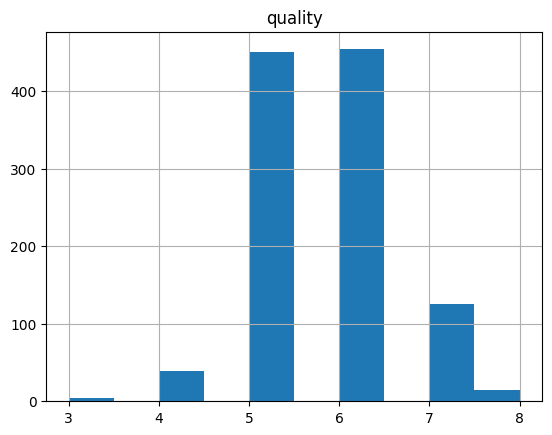

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
for c in rw:
    rw[c].hist()
    plt.title(c)
    plt.show()

<Axes: >

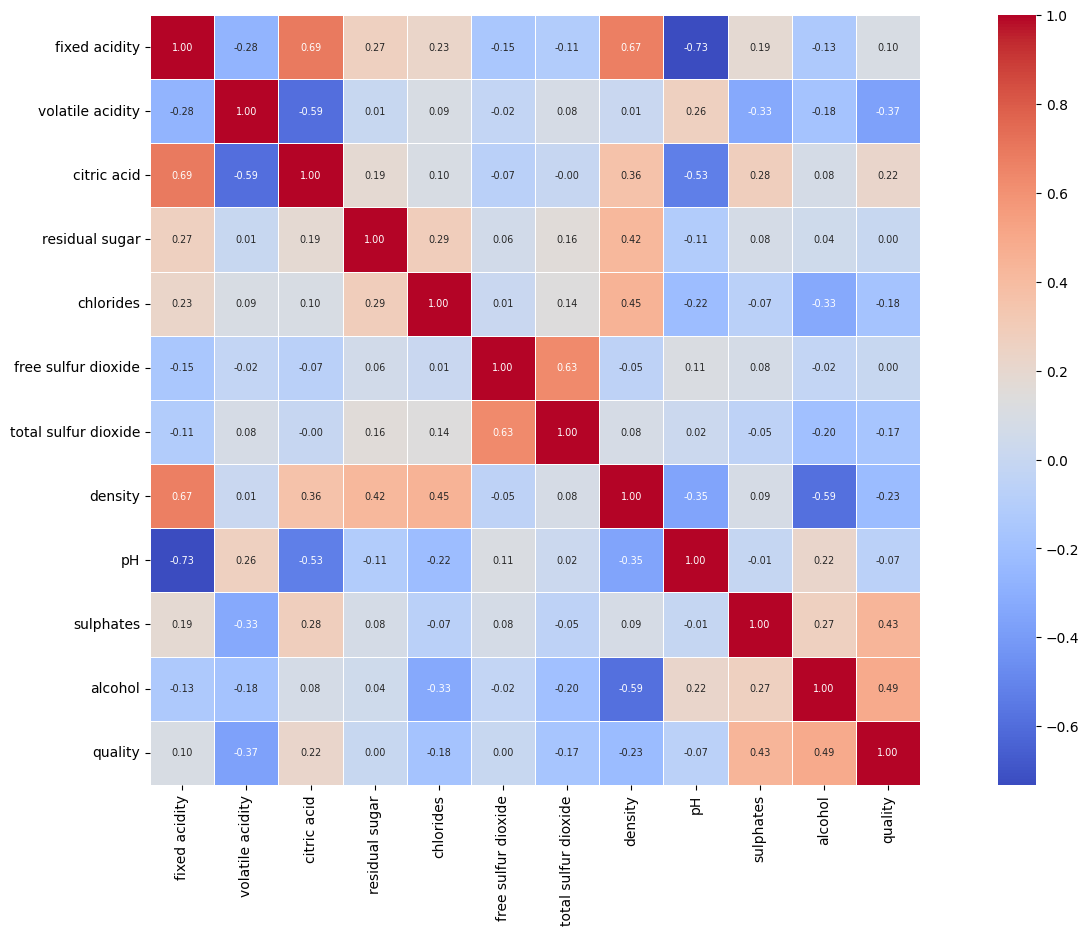

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
matrix = rw.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(matrix, cmap = 'coolwarm', square = True,
            annot = True, fmt = ',.2f',
           annot_kws={'size':'x-small'}, linewidths = 0.5)

<Axes: xlabel='quality', ylabel='alcohol'>

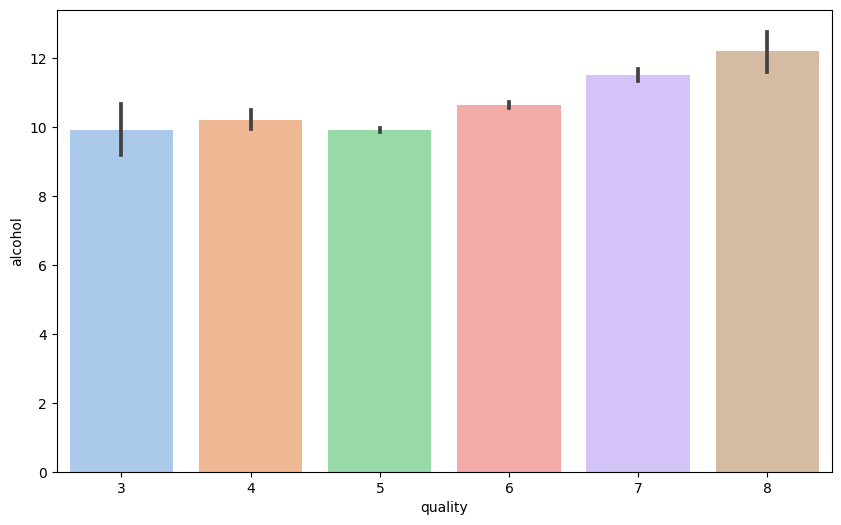

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = rw, palette = 'pastel')

<Axes: xlabel='quality', ylabel='volatile acidity'>

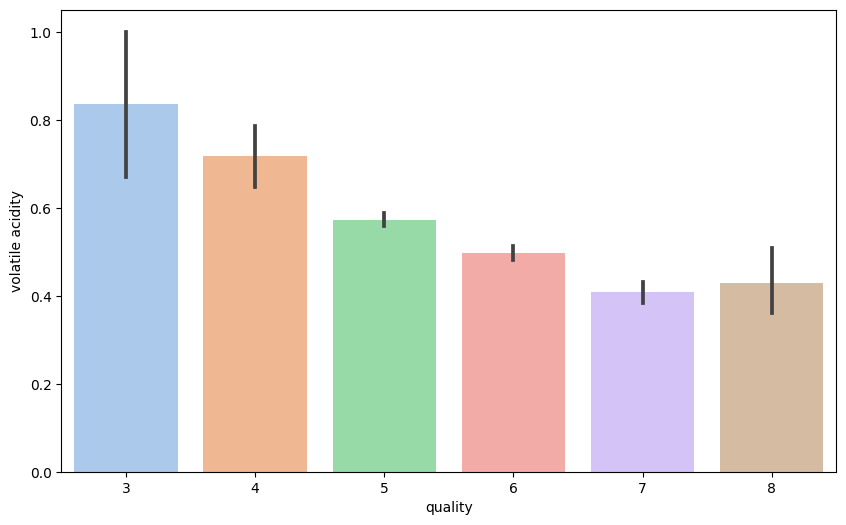

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = rw, palette = 'pastel')

Applying Machine Learning

In [16]:
bins = (1, 5.5, 10)
group_names = ['bad', 'good']
rw['quality'] = pd.cut(rw['quality'], bins = bins, labels = group_names)

<ipython-input-16-accab8284aee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw['quality'] = pd.cut(rw['quality'], bins = bins, labels = group_names)


In [17]:
from sklearn import preprocessing
quality_label =preprocessing.LabelEncoder()
rw['quality'] = quality_label.fit_transform(rw['quality'])

<ipython-input-17-3c3689593566>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rw['quality'] = quality_label.fit_transform(rw['quality'])


In [18]:
rw['quality'].value_counts().sort_values()

0    494
1    594
Name: quality, dtype: int64

In [19]:
X = rw.drop('quality', axis = 1)
y = rw['quality']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [22]:
import sklearn.linear_model
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

Logistic Regression

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred_log = logreg.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, pred_log)
precision = precision_score(y_test, pred_log)

print("Accuracy: ", accuracy)
print("Precision: ", precision)

Accuracy:  0.7568807339449541
Precision:  0.7542372881355932


Random forest

In [25]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
pred_randomforest = randomforest.predict(X_test)
accuracy = accuracy_score(y_test, pred_randomforest)
precision = precision_score(y_test, pred_randomforest)
print("Accuracy: ", accuracy)
print("Precision: ", precision)

Accuracy:  0.7339449541284404
Precision:  0.7310924369747899
